In [1]:
!pip install scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=6d9949ccfbd43e09541c8ac327c6c080bded72f00a005329c04452fedec2d581
  Stored in directory: c:\users\josen\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Criando os universos (domínios) para entradas e saídas
temperatura = ctrl.Antecedent(np.arange(15, 46, 1), 'temperatura') #15 a 45 graus celcius
preco = ctrl.Antecedent(np.arange(1, 7, 1), 'preco') #1 a 6
consumo = ctrl.Consequent(np.arange(500, 6001, 1), 'consumo') #500 a 6000

In [5]:
# Criando funções de pertinência
temperatura['baixa'] = fuzz.gaussmf(temperatura.universe, 15, 6.369)
temperatura['media'] = fuzz.gaussmf(temperatura.universe, 30, 6.369)
temperatura['alta'] = fuzz.gaussmf(temperatura.universe, 45, 6.369)

preco['baixo'] = fuzz.gaussmf(preco.universe, 1, 1.061)
preco['medio'] = fuzz.gaussmf(preco.universe, 3.05, 1.061)
preco['alto'] = fuzz.gaussmf(preco.universe, 6, 1.061)

consumo['pequeno'] = fuzz.trimf(consumo.universe, [-2250,500,3250])
consumo['medio'] = fuzz.trimf(consumo.universe, [500,3250,6000])
consumo['grande'] = fuzz.trimf(consumo.universe, [3250,6000,8750])


C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


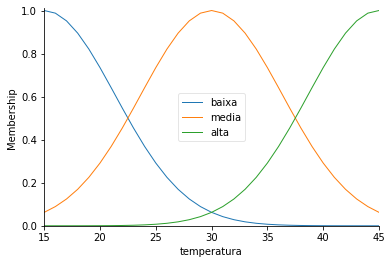

In [6]:
temperatura.view()

C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


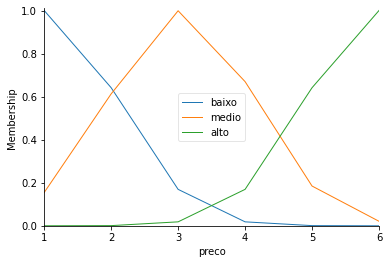

In [7]:
preco.view()

C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


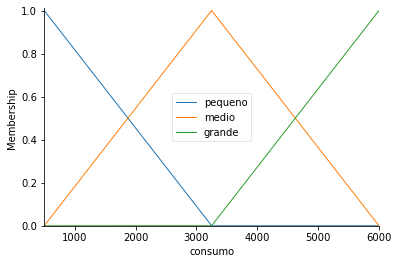

In [8]:
consumo.view()

In [9]:
# Criando regras

rule_1 = ctrl.Rule(temperatura['baixa'] & preco['baixo'], consumo['grande'])
rule_2 = ctrl.Rule(temperatura['baixa'] & preco['medio'], consumo['medio'])
rule_3 = ctrl.Rule(temperatura['baixa'] & preco['alto'], consumo['pequeno'])
rule_4 = ctrl.Rule(temperatura['media'] & preco['baixo'], consumo['grande'])
rule_5 = ctrl.Rule(temperatura['media'] & preco['medio'], consumo['medio'])
rule_6 = ctrl.Rule(temperatura['media'] & preco['alto'], consumo['pequeno'])
rule_7 = ctrl.Rule(temperatura['alta'] & preco['baixo'], consumo['grande'])
rule_8 = ctrl.Rule(temperatura['alta'] & preco['medio'], consumo['medio'])
rule_9 = ctrl.Rule(temperatura['alta'] & preco['alto'], consumo['pequeno'])


In [10]:
# Criando um controlador fuzzy genérico com as regras mapeadas pelo especialista
consumo_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9])

# Estabelece um modelo de simulação para processar as entradas numéricas fornecidas pelo usuário no controlador acima
consumo_maquina_A = ctrl.ControlSystemSimulation(consumo_ctrl)

In [11]:
# Define entradas da UX com o usuário:
consumo_maquina_A.input['temperatura'] = 30
consumo_maquina_A.input['preco'] = 3.5

# Calcula a saída numérica já defuzzificada com o centroide
consumo_maquina_A.compute()

3249.9999999999245


C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


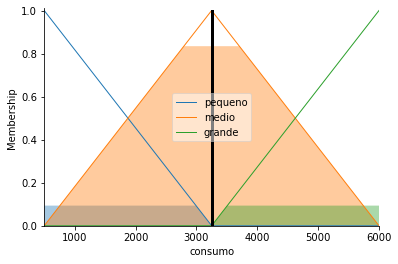

In [13]:
# Exibe resultados

print(consumo_maquina_A.output['consumo'])

consumo.view(sim=consumo_maquina_A)